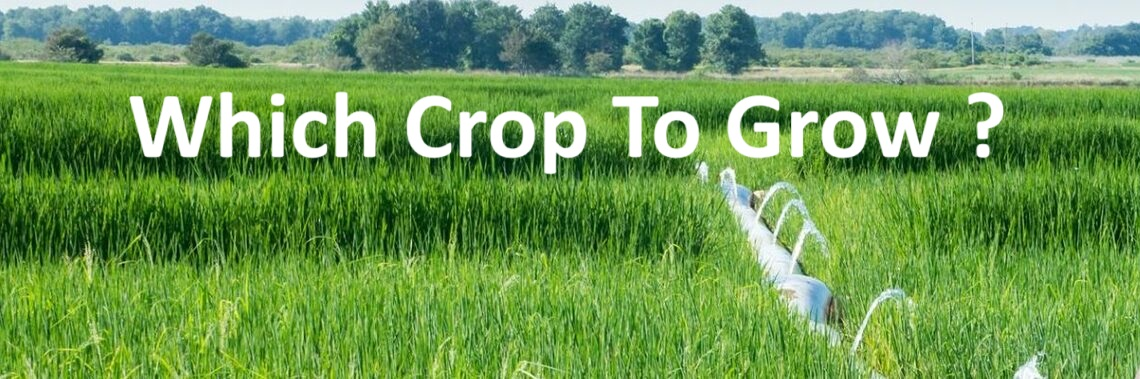

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# EDA

In [2]:
df = pd.read_csv('crop_dataset.csv')
df.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


|Field name|Description|
|--- |--- |
|N|Nitrogen of soil
|P|Phosphorous of soil
|K|Potassium of soil
|ph|PH of soil
|label|Type of crop that is suitable

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df['label'].nunique()

22

#### 22 Types of crop can be cultivated 

In [6]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

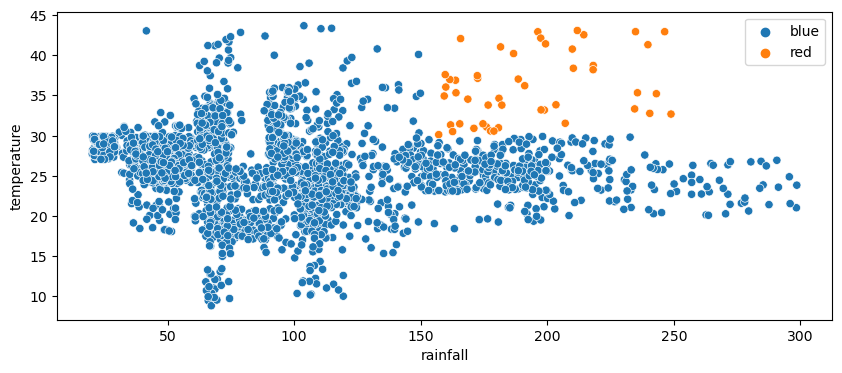

In [8]:
plt.figure(figsize=(10,4))
color = ['red' if i == True else 'blue' for i in (df.temperature > 30) & (df.rainfall > 150)]
sns.scatterplot(data=df,x='rainfall',y='temperature',hue=color)
plt.show()

#### There are some cases where there is heavy rainfall although the temperature is high i.e above 30 degree

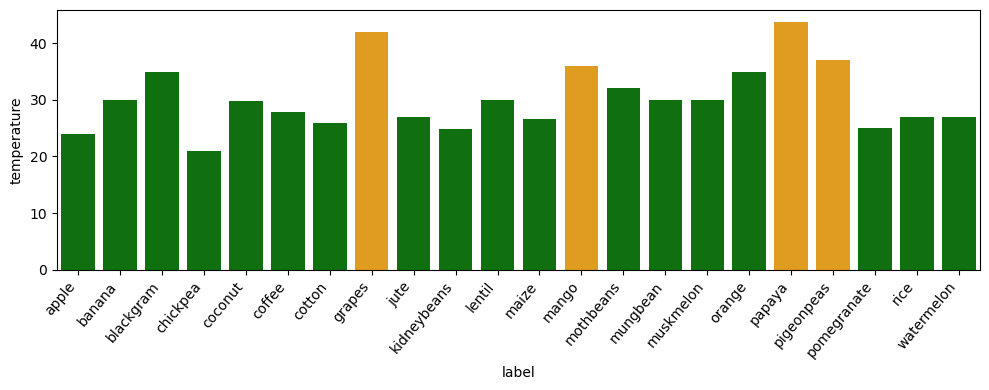

In [9]:
grp = df.groupby('label')['temperature'].max()
grp_df = pd.DataFrame(grp)

cols = ['orange' if x > 35 else 'green' for x in grp_df['temperature']]

plt.figure(figsize=(10,4))
ax = sns.barplot(data=df,x=grp_df.index,y=grp_df['temperature'], palette=cols)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

#### Following crops need high temperature i.e above 35 degree celcius
>grapes <br/>
>papaya <br/>
>mango <br/>
>pigeonpeans <br/>

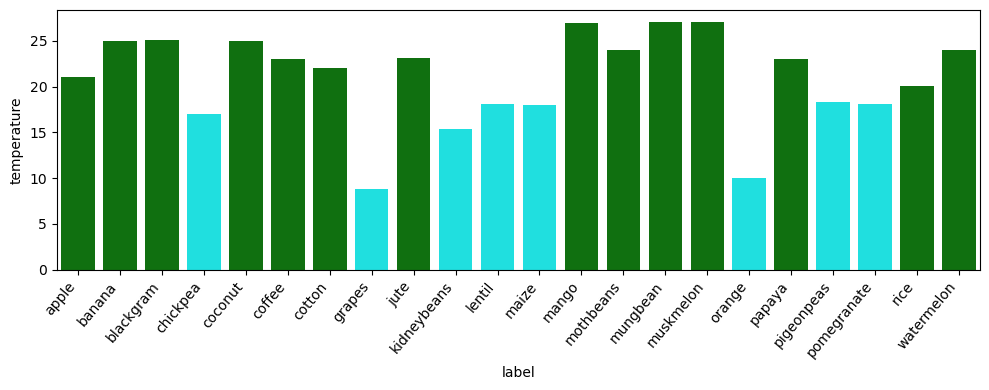

In [10]:
grp = df.groupby('label')['temperature'].min()
grp_df = pd.DataFrame(grp)

cols = ['cyan' if x < 20 else 'green' for x in grp_df['temperature']]

plt.figure(figsize=(10,4))
ax = sns.barplot(data=df,x=grp_df.index,y=grp_df['temperature'],palette=cols)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

#### Following crops need low temperature i.e below 20 degree celcius
>grapes <br/>
>chickpea <br/>
>kidneybeans <br/>
>lentil <br/>
>maize <br/>
>orange <br/>
>pigeonpeas <br/>
>pomegranate <br/>

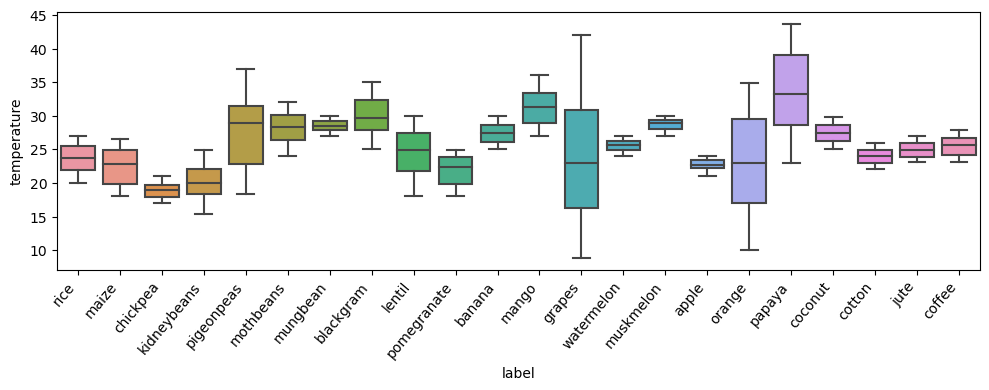

In [11]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(data=df,x='label',y='temperature')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

### Conclusion :
#### (a) Grapes and Pigeonpeas are the crops which can be cultivated during summer as well as winter
#### (b) pigeonpeas, grapes, orange, papaya have variations in their temperature

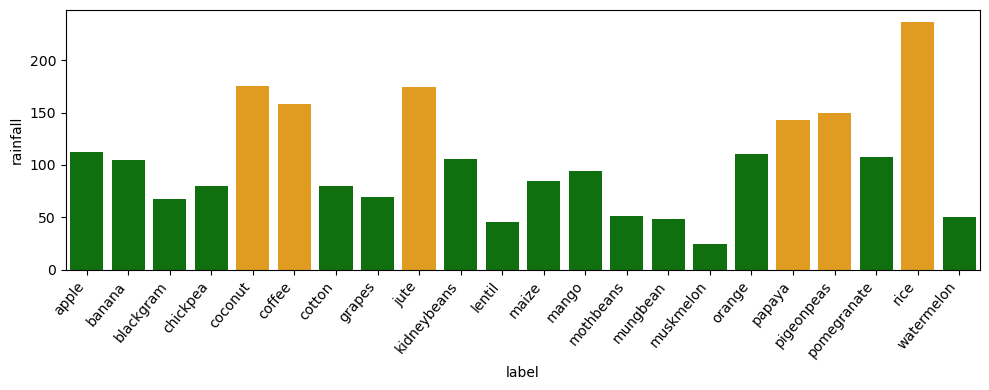

In [12]:
grp = df.groupby('label')['rainfall'].mean()
grp_df = pd.DataFrame(grp)

cols = ['orange' if x > 120 else 'green' for x in grp_df['rainfall']]
plt.figure(figsize=(10,4))
ax = sns.barplot(data=df,x=grp_df.index,y=grp_df['rainfall'],palette=cols)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

#### Following crops need more rainfall to be cultivated
>coconut <br/>
>coffee <br/>
>jute <br/>
>papaya <br/>
>pigeonpeas <br/>
>rice <br/>

#### Rice needs highest rainfall and muskmelon need least rainfall to be cultivated

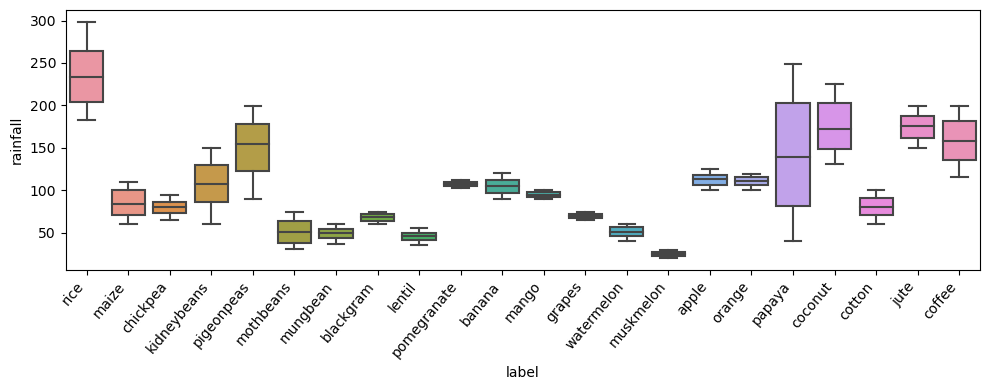

In [13]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(data=df,x='label',y='rainfall')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

#### pigeonpeas and papaya has variation in rainfall

In [14]:
x = df[['N','P','K','temperature','humidity','ph','rainfall']].values
x[0:5]

array([[ 90.        ,  42.        ,  43.        ,  20.87974371,
         82.00274423,   6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        ,  21.77046169,
         80.31964408,   7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        ,  23.00445915,
         82.3207629 ,   7.84020714, 263.9642476 ],
       [ 74.        ,  35.        ,  40.        ,  26.49109635,
         80.15836264,   6.9804009 , 242.8640342 ],
       [ 78.        ,  42.        ,  42.        ,  20.13017482,
         81.60487287,   7.62847289, 262.7173405 ]])

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
y = df['label'].values
y[0:5]

array(['rice', 'rice', 'rice', 'rice', 'rice'], dtype=object)

In [17]:
le_label_ = LabelEncoder()
le_y = le_label_.fit_transform(y)
le_y

array([20, 20, 20, ...,  5,  5,  5])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,le_y,test_size=0.2,random_state=42)

In [20]:
y_test[:5]

array([15, 21, 17, 17,  0])

# Logistic Regression

## Training the Model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model_lr = LogisticRegression()

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
    'penalty' : ['l1','l2'],
    'C' : [0.1,0.001,1,10,100],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
}

In [25]:
model_cv_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid, scoring='accuracy',cv=4)

In [ ]:
model_cv_lr.fit(x_train,y_train)

In [27]:
print(model_cv_lr.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


## Accuracy Score

In [28]:
print(round((model_cv_lr.best_score_)*100,3))

98.409


In [29]:
y_predict_lr = model_cv_lr.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
score = accuracy_score(y_test,y_predict_lr)
accu = []
accu.append(round(score*100,3))
print('Accuracy Score of LR :',round(score*100,3),'%')

Accuracy Score of LR : 97.727 %


In [32]:
from sklearn.metrics import classification_report

In [33]:
report = classification_report(y_test,y_predict_lr)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.87      0.87      0.87        23
           9       1.00      0.95      0.97        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       0.96      1.00      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       0.96    

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [35]:
lbl = np.unique(le_y)
lbl = le_label_.inverse_transform(lbl)
lbl

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

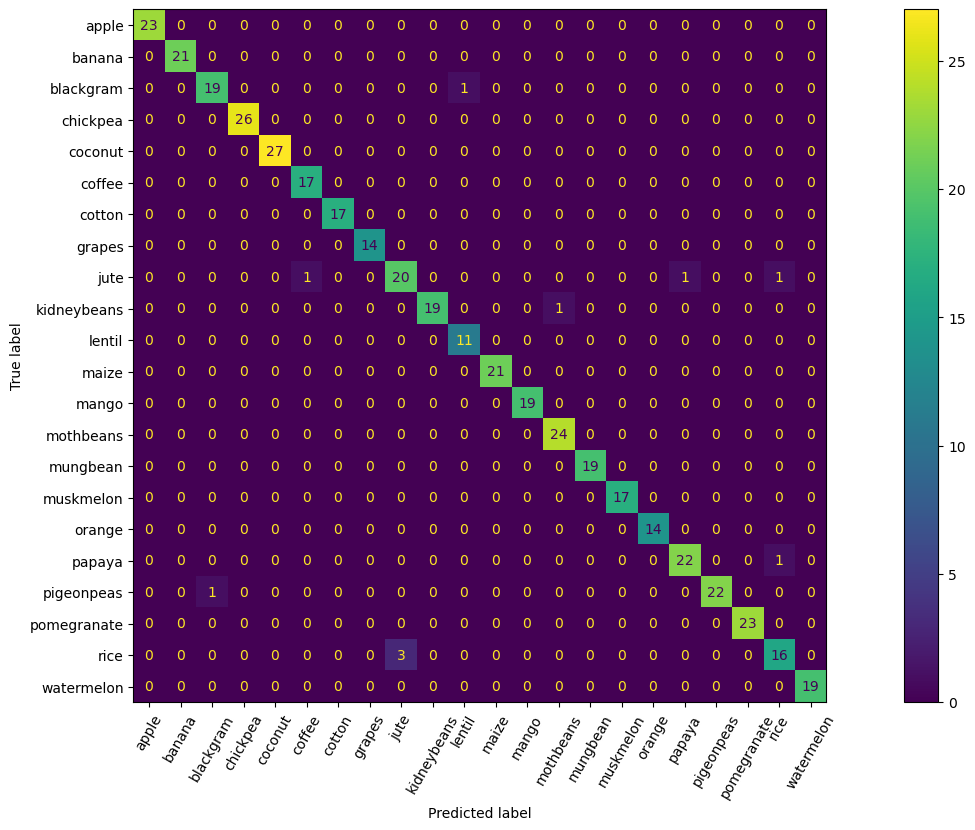

In [36]:
conf_matrix = confusion_matrix(y_test,y_predict_lr)
fig, ax = plt.subplots(figsize=(20,9))
display = ConfusionMatrixDisplay(conf_matrix,display_labels=lbl)
display.plot(xticks_rotation=60,ax=ax)
plt.show()

## Prediction Of Data

In [37]:
predict = [[35,41,45,25.297818,81,7.121934,97]]
ans = model_cv_lr.predict(predict)
ans = le_label_.inverse_transform([ans[0]])
print(ans[0])

pomegranate


## Probability Of Crops That Can Be Cultivated

|Field|Observations|
|-----|---------|
|N|86|
|P|45|
|K|66|
|Temperature|28|
|Humidity|67|
|ph|7|
|rainfall|95|

In [38]:
ask = [[86,45,66,28,67,7,95]]

In [39]:
probability = model_cv_lr.predict_proba(ask)

In [40]:
for i,j in zip(lbl,np.round(probability[0],3)):
    print(i,j)

apple 0.0
banana 0.024
blackgram 0.0
chickpea 0.046
coconut 0.0
coffee 0.0
cotton 0.0
grapes 0.0
jute 0.029
kidneybeans 0.0
lentil 0.0
maize 0.0
mango 0.0
mothbeans 0.0
mungbean 0.0
muskmelon 0.0
orange 0.0
papaya 0.0
pigeonpeas 0.0
pomegranate 0.0
rice 0.0
watermelon 0.9


### From above model we can observe that watermelon (probability=0.9) is most suitable to cultivate under this observation

# Support Vector Machine (SVM)

## Trainig The Model

In [41]:
from sklearn.svm import SVC

In [42]:
model_svm = SVC()

In [43]:
param_grid = {
    'C' : [0.1, 1, 8, 10, 12, 1000],
    'kernel' : ['rbf'],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]
}

In [44]:
model_cv_svm = GridSearchCV(estimator=model_svm,param_grid=param_grid,scoring='accuracy',cv=4)

In [45]:
model_cv_svm.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 1, 8, 10, 12, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [46]:
model_cv_svm.best_params_

{'C': 8, 'gamma': 0.001, 'kernel': 'rbf'}

In [47]:
model_cv_svm.best_score_*100

98.80681818181819

In [48]:
y_predict_svm = model_cv_svm.predict(x_test)

## Accuracy Score

In [49]:
score = accuracy_score(y_test,y_predict_svm)
accu.append(round(score*100,3))
accu

[97.727, 98.182]

In [50]:
print('Accuracy Score of SVM :',round(score*100,3),'%')

Accuracy Score of SVM : 98.182 %


In [51]:
from sklearn.metrics import classification_report

In [52]:
report = classification_report(y_test,y_predict_svm)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.79      1.00      0.88        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

## Predict

In [53]:
predict = [[56,41,45,25.297818,93,7.121934,197]]
ans = model_cv_svm.predict(predict)
ans = le_label_.inverse_transform([ans[0]])
print(ans[0])

jute


# Comparing Both The Models

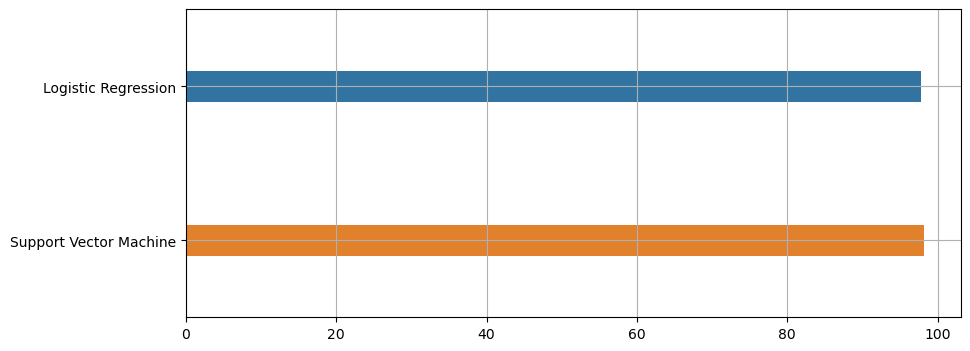

In [54]:
model = ['Logistic Regression','Support Vector Machine']
plt.figure(figsize=(10,4))
sns.barplot(x=accu,y=model,orient='h',width=0.2)
plt.grid()
plt.show()

In [56]:
print("Accuracy Score :")
for i,j in zip(model,accu):
    print(i,':',j,'%')

Accuracy Score :
Logistic Regression : 97.727 %
Support Vector Machine : 98.182 %
